In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial

In [2]:
infile = "output/test_At10_160k_boxes_10.5um/out_Atdecay_10_spacing_2um_1216.bin"

In [3]:
particle_map = {1: "alpha",
                2: "gamma",
                3: "e-",
                4: "nu_e",
                5: "At211",
                6: "Po211",
                7: "Bi207",
                8: "Pb207",
                9: "e+" }

In [4]:
process_map = {1: "Decay",
                2: "ionIoni",
                3: "msc",
                4: "eIoni",
                5: "phot",
                6: "eBrem",
                7: "compt"}

In [5]:
from dataclasses import dataclass, InitVar, field
from typing import List

@dataclass
class Event:
    psdata: InitVar[List[float]]
    positions: List[float] = field(init=False)
    momentum: List[float] = field(init=False)
    energy: float = field(init=False)
    eventID: int = field(init=False)
    particleID: int = field(init=False)
    copyNo: int = field(init=False)
    time: float = field(init=False)
    parent: int = field(init=False)
    excitation: float = field(init=False)

    def __post_init__(self, data_arr):
            if data_arr is not None:
                self.positions = data_arr[:3]
                self.momentum = data_arr[3:6]
                self.energy = data_arr[6]
                self.eventID = int(data_arr[7])
                self.particleID = int(data_arr[8])
                self.copyNo = int(data_arr[9])
                self.time = data_arr[10]
                self.parent = data_arr[11]
                # if len(data_arr)>11:
                #     self.excitation = data_arr[12]


In [6]:
class PSEvents:
    def __init__(self, psfile):
        self.events=[]
        self.psfile = psfile
        events_data = np.fromfile(self.psfile, dtype='float32').reshape(-1,12)
        for evt in events_data:
            self.events.append(Event(evt))
    @property
    def energies(self):
        if len(self.events):
            return np.array([evt.energy for evt in self.events])
    # @property
    # def exc_energies(self):
    #     if len(self.events):
    #         return np.array([evt.excitation for evt in self.events])
    @property
    def eventIDs(self):
        if len(self.events):
            return np.array([evt.eventID for evt in self.events])
    @property
    def particleIDs(self):
        if len(self.events):
            return np.array([evt.particleID for evt in self.events])
    @property
    def copyNos(self):
        if len(self.events):
            return np.array([evt.copyNo for evt in self.events])
    @property
    def parents(self):
        if len(self.events):
            return np.array([evt.parent for evt in self.events])
    @property
    def parent_names(self):
        return list(map(lambda pid: particle_map[pid], self.parents))
    @property
    def particle_names(self):
        return list(map(lambda pid: particle_map[pid], self.particleIDs))
    @property
    def times(self):
        if len(self.events):
            return np.array([evt.time for evt in self.events])



In [7]:
events = PSEvents(infile)

In [8]:
for i, (id, pname, copyno, energy, proc) in enumerate(zip(events.eventIDs, events.particle_names, events.copyNos, events.energies, events.process_names)):
    print(f"{i}: {id}, {pname}, {copyno}, {energy}, {proc}")

0: 0, nu_e, 143, 0.6757628321647644, Decay
1: 0, nu_e, 42, 0.6757628321647644, Decay
2: 0, gamma, 4790, 1.063654899597168, Decay
3: 0, gamma, 9032, 1.063654899597168, Decay
4: 0, gamma, 13375, 1.063654899597168, Decay
5: 0, gamma, 143, 0.569697380065918, Decay
6: 0, gamma, 42, 0.569697380065918, Decay
7: 0, gamma, 1343, 0.08817923069000244, Decay
8: 0, gamma, 5884, 0.08817923069000244, Decay
9: 0, gamma, 10325, 0.08817923069000244, Decay
10: 0, gamma, 27693, 0.08817923069000244, Decay
11: 1, nu_e, 1626, 0.6918748021125793, Decay
12: 1, nu_e, 5965, 0.6918748021125793, Decay
13: 1, nu_e, 14546, 0.6918748021125793, Decay
14: 1, nu_e, 18787, 0.6918748021125793, Decay
15: 1, nu_e, 23028, 0.6918748021125793, Decay
16: 1, nu_e, 40094, 0.6918748021125793, Decay
17: 1, alpha, 4579, 6.939271926879883, Decay
18: 1, e-, 635, 0.0003071160754188895, ionIoni
19: 1, e-, 735, 0.001329118269495666, ionIoni
20: 1, e-, 734, 0.0014241556636989117, ionIoni
21: 1, gamma, 629, 0.09014252573251724, Decay
22: 1

In [9]:
np.unique(events.particle_names)

array(['alpha', 'e-', 'gamma', 'nu_e'], dtype='<U5')

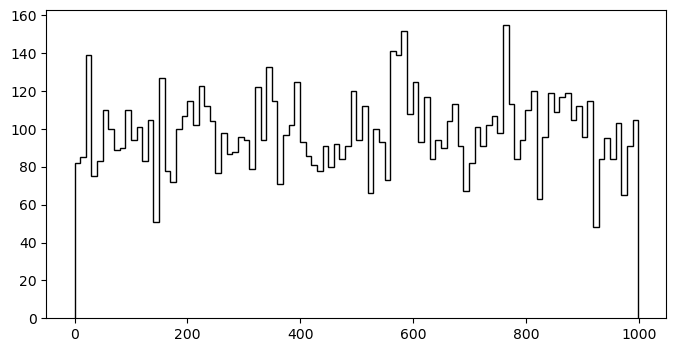

In [24]:
plt.figure(figsize=(8,4))
plt.hist(events.eventIDs, bins=100, histtype=u'step', edgecolor='k')
plt.show()

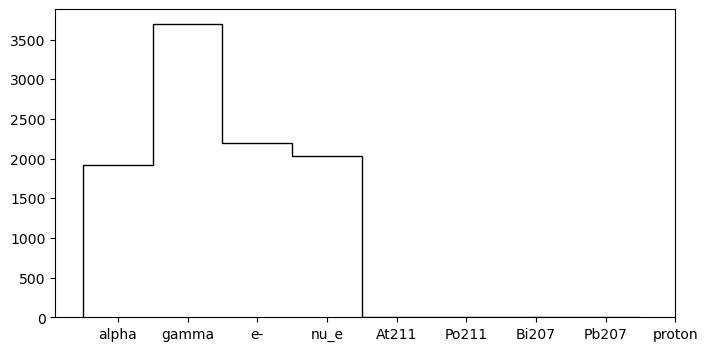

In [25]:
plt.figure(figsize=(8,4))
plt.hist(events.particleIDs, bins=range(1,10), histtype=u'step', edgecolor='k', align='left')
plt.xticks(range(1,10), list(map(lambda pid: particle_map[pid], range(1,10))))
plt.show()

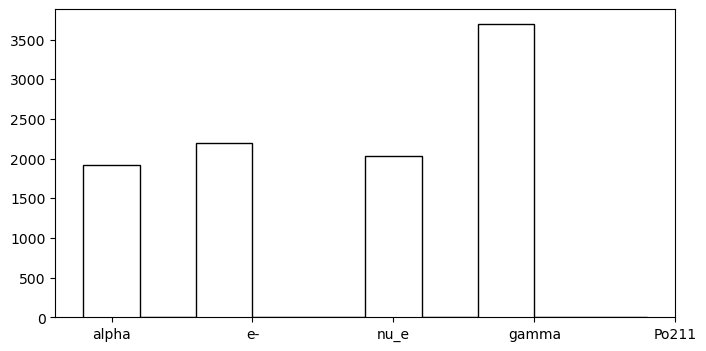

In [26]:
plt.figure(figsize=(8,4))
plt.hist(events.particle_names, histtype=u'step', edgecolor='k',  align='left')
plt.show()

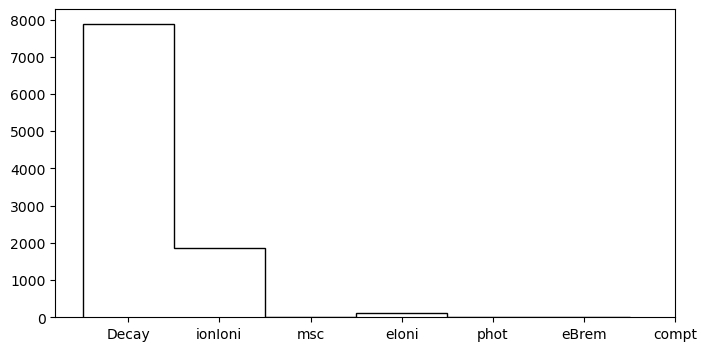

In [27]:
plt.figure(figsize=(8,4))
plt.hist(events.processes, bins=range(1,8), histtype=u'step', edgecolor='k', align='left')
plt.xticks(range(1,8), list(map(lambda pid: process_map[pid], range(1,8))))
plt.show()

In [28]:
np.unique(events.process_names)

array(['Decay', 'eBrem', 'eIoni', 'ionIoni', 'phot'], dtype='<U7')

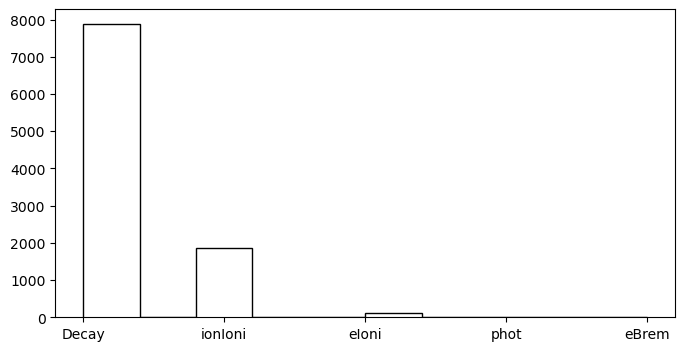

In [29]:
plt.figure(figsize=(8,4))
plt.hist(events.process_names, histtype=u'step', edgecolor='k')
#plt.xticks(range(1,8), list(map(lambda pid: process_map[pid], range(1,8))))
plt.show()

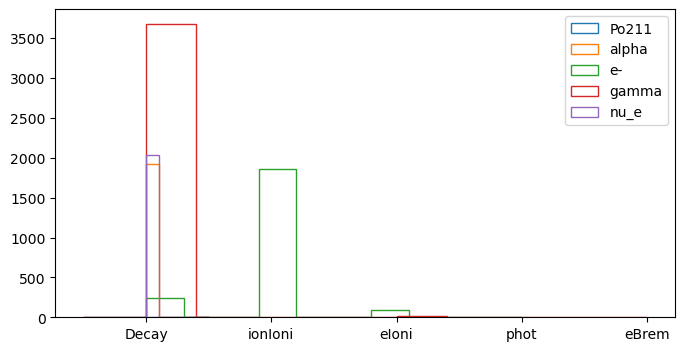

In [46]:
bplt.figure(figsize=(8,4))
for particle in np.unique(events.particle_names):
    plt.hist(np.array(events.process_names)[np.array(events.particle_names)==particle], histtype=u'step', label=f'{particle}')
# plt.xticks(range(1,8), list(map(lambda pid: process_map[pid], range(1,8))))
plt.legend()
plt.show()

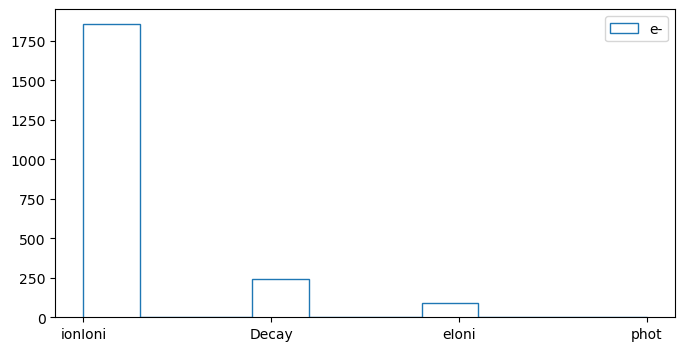

In [47]:
plt.figure(figsize=(8,4))
plt.hist(np.array(events.process_names)[np.array(events.particle_names)=='e-'], histtype=u'step', label=f'e-')
# plt.xticks(range(1,8), list(map(lambda pid: process_map[pid], range(1,8))))
plt.legend()
plt.show()

In [59]:
e_events = np.where(np.array(events.particle_names)=='e-')

In [60]:
import pandas as pd

In [64]:
event_dict = {"particle": events.particle_names, "energy": events.energies, "copyNo": events.copyNos, "process": events.process_names
}

In [66]:
events_df = pd.DataFrame.from_dict(event_dict)

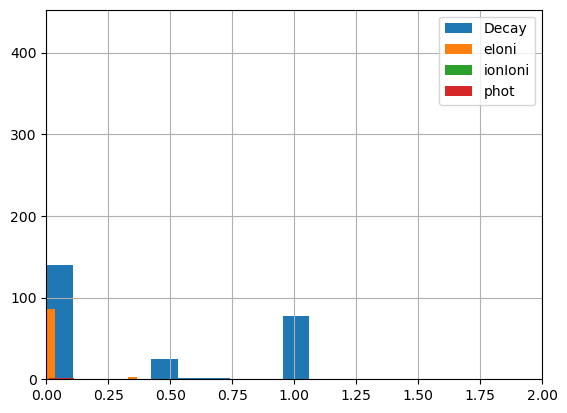

In [78]:
events_df[events_df['particle']=='e-'].groupby(["process"])['energy'].hist(legend=["process"])
plt.xlim(0,2)
plt.legend()

/tmp/ipykernel_2670/344679638.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  plt.hist(events.energies[(events.particleIDs=='e-') & (np.array(events.process_names)=='Decay')], bins=bins, histtype=u'step', align='left')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


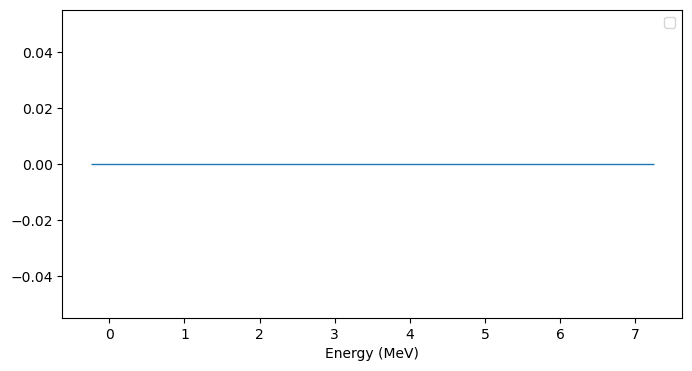

In [49]:
bins = np.arange(0,8,0.5)
plt.figure(figsize=(8,4))
# plt.hist(events.energies, bins=bins, histtype=u'step', edgecolor='k', align='left', label='all')
plt.hist(events.energies[(events.particleIDs=='e-') & (np.array(events.process_names)=='Decay')], bins=bins, histtype=u'step', align='left')

plt.xlabel("Energy (MeV)")
plt.legend()
plt.show()

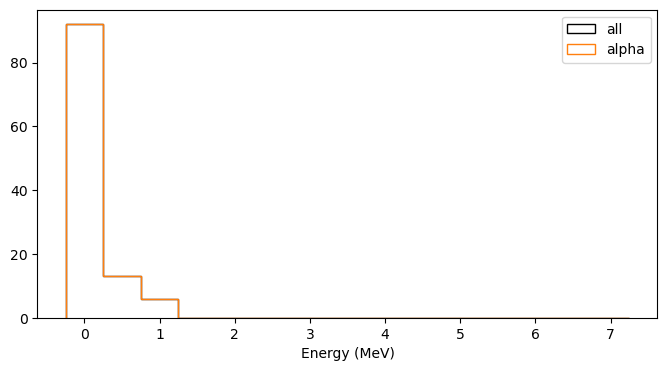

In [62]:
bins = np.arange(0,8,0.5)
plt.figure(figsize=(8,4))
plt.hist(events.energies, bins=bins, histtype=u'step', edgecolor='k', align='left', label='all')
for part in np.unique(events.particleIDs):
    plt.hist(events.energies[events.particleIDs==part], bins=bins, histtype=u'step', align='left', label=particle_map[part])

plt.xlabel("Energy (MeV)")
plt.legend()
plt.show()

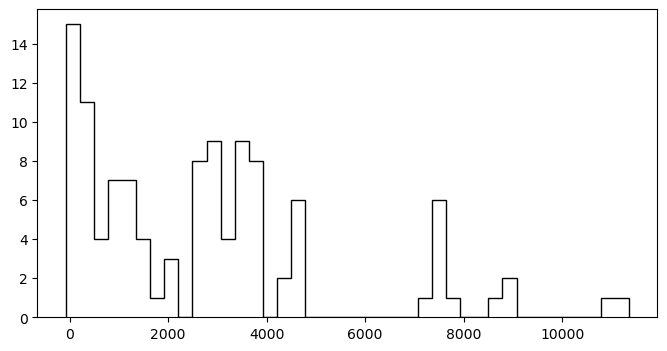

In [63]:
plt.figure(figsize=(8,4))
plt.hist(events.copyNos, bins=40, histtype=u'step', edgecolor='k', align='left')
plt.hist(events.copyNos[events.copyNos>=40000], bins=40, histtype=u'step', edgecolor='red', align='left')
plt.show()

In [64]:
def map_radius_copyno(n_boxes, boxes_per_R):
    ranges_radii = {}
    cnumbers = np.arange(0, n_boxes+boxes_per_R, boxes_per_R)
    n_files = n_boxes/boxes_per_R
    for r, (cmin, cmax) in enumerate(zip(cnumbers, cnumbers[1:])):
        ranges_radii[r] = range(cmin, cmax)
    assert(len(ranges_radii)==n_files)
    return ranges_radii

In [65]:
ranges_radii = map_radius_copyno(160000, 4000)

In [66]:
events_radii = np.zeros(len(events.copyNos))
for r in range(40):
    check_copynop = partial(lambda n, range_r : n in range_r, range_r=ranges_radii[r])
    maps = np.vectorize(check_copynop)
    maps_r = maps(events.copyNos)
    events_radii[maps_r] = 10.5+2*r
    print(f"done {r}")

done 0
done 1
done 2
done 3
done 4
done 5
done 6
done 7
done 8
done 9
done 10
done 11
done 12
done 13
done 14
done 15
done 16
done 17
done 18
done 19
done 20
done 21
done 22
done 23
done 24
done 25
done 26
done 27
done 28
done 29
done 30
done 31
done 32
done 33
done 34
done 35
done 36
done 37
done 38
done 39


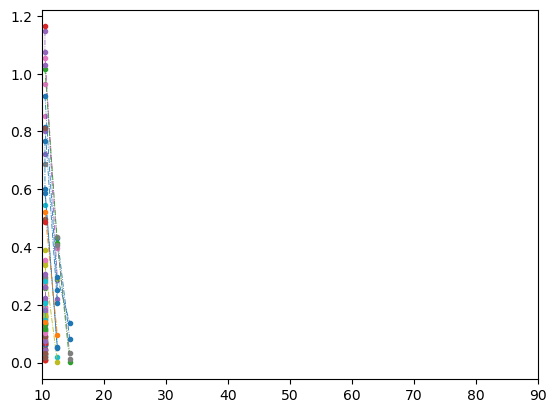

In [67]:
plt.figure()
for evt in np.unique(events.eventIDs)[:100]:
    plt.plot(np.array(events_radii)[(events.particleIDs==1) & (events.eventIDs==evt)],
            events.energies[(events.particleIDs==1) & (events.eventIDs==evt)], 
            linestyle='-.', marker='o', markersize=3, linewidth=0.6, label=f'Event {evt}')
plt.xlim(10,90)
plt.show()

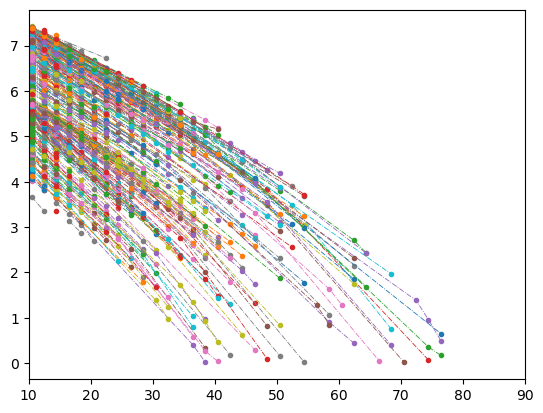

In [29]:

plt.figure()
for evt in np.unique(events.eventIDs):
    plt.plot(np.array(events_radii)[(events.particleIDs==1) & (events.eventIDs==evt)],
            events.energies[(events.particleIDs==1) & (events.eventIDs==evt)], 
            linestyle='-.', marker='o', markersize=3, linewidth=0.6, label=f'Event {evt}')
plt.xlim(10,90)
plt.show()

In [68]:
events.energies[events.eventIDs==182]

array([0.21400635], dtype=float32)

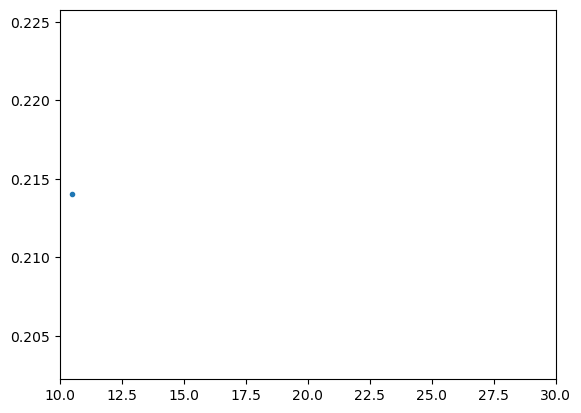

In [69]:
plt.figure()
evt=182
plt.plot(np.array(events_radii)[(events.particleIDs==1) & (events.eventIDs==evt)],
            events.energies[(events.particleIDs==1) & (events.eventIDs==evt)], 
            linestyle='-.', marker='o', markersize=3, linewidth=0.6, label=f'Event {evt}')
plt.xlim(10,30)
plt.show()